In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Notebook/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [9]:
x=data.iloc[:,1:-1].values
y=data.iloc[:, -1].values

In [10]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [11]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

Text(0, 0.5, 'salary')

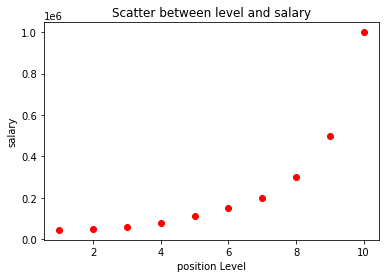

In [13]:
plt.scatter(x,y,color='red')
plt.title("Scatter between level and salary")
plt.xlabel('position Level')
plt.ylabel('salary')

In [14]:
# now we have to apply linear regression model

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]])

In [18]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
poly_reg=PolynomialFeatures(degree=4)

In [32]:
x_poly=poly_reg.fit_transform(x)

In [41]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)

In [35]:
lin_reg2=LinearRegression()

In [36]:
lin_reg2.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=lin_reg2.predict(x_test)

In [38]:
y_pred

array([ 62618.48984248, 554488.61683452])

In [39]:
R2_score=r2_score(y_test,y_pred)

In [40]:
  R2_score

0.9692575841570863

In [42]:
y_pred=lin_reg2.predict([[1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])
y_pred

array([998396.28808559])